# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Membaca dataset dari file CSV
df = pd.read_csv('Telco-Customer_Clustered.csv')
print("Shape dataset:", df.shape)
df.head()

Shape dataset: (7032, 8)


,tenure,MonthlyCharges,TotalCharges,Churn,Contract,InternetService,PaymentMethod,Cluster
0,1.0,29.85,29.85,0,Month-to-month,DSL,Electronic check,1
1,34.0,56.95,1889.50,0,One year,DSL,Other,3
2,2.0,53.85,108.15,1,Month-to-month,DSL,Other,1
3,45.0,42.30,1840.75,0,One year,DSL,Other,3
4,2.0,70.70,151.65,1,Month-to-month,Fiber optic,Electronic check,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   float64
 1   MonthlyCharges   7032 non-null   float64
 2   TotalCharges     7032 non-null   float64
 3   Churn            7032 non-null   int64  
 4   Contract         7032 non-null   object 
 5   InternetService  7032 non-null   object 
 6   PaymentMethod    7032 non-null   object 
 7   Cluster          7032 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 439.6+ KB


In [4]:
df.isna().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
Contract,0
InternetService,0
PaymentMethod,0
Cluster,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
from sklearn.compose import ColumnTransformer

# Pisahkan fitur dan target (target: Cluster)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Tentukan fitur kategorikal dan numerikal
categorical_features = ['Contract', 'InternetService', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# preprocessor untuk one-hot encoding fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Transformasikan data
X_processed = preprocessor.fit_transform(X)

# Split data menjadi train dan test (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.4, random_state=42
)

print("\nUkuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (4219, 12)
Ukuran data uji: (2813, 12)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Menggunakan Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9879132598649129

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       770
           1       0.99      0.99      0.99       758
           2       0.99      0.99      0.99       795
           3       0.98      0.99      0.98       490

    accuracy                           0.99      2813
   macro avg       0.99      0.99      0.99      2813
weighted avg       0.99      0.99      0.99      2813



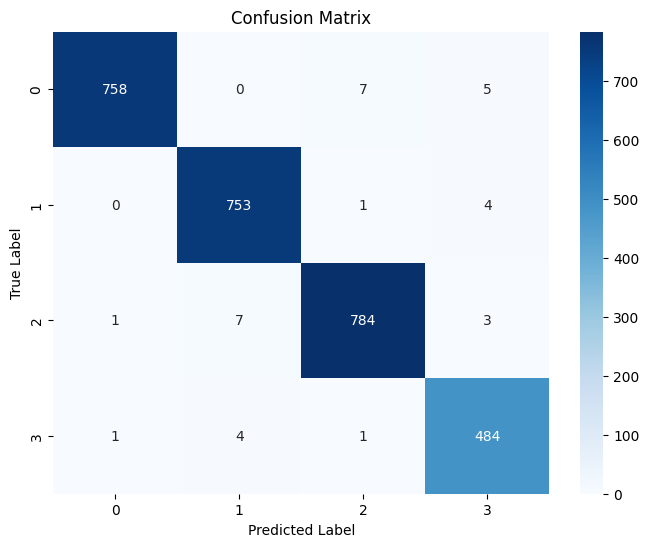

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Insight**
- Algoritma yang digunakan, Random Forest menghasilkan model yang sangat bagus dengan akurasi 98%
- Untuk pembacaan confusion matrix contoh:
  - Klaster 0 (Baris 1): 758 sampel diprediksi benar sebagai Klaster 0, 0 salah prediksi ke Klaster 1, 7 salah ke Klaster 2, & 5 salah ke Klaster 3

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Lakukan grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)

# Gunakan model terbaik
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluasi setelah tuning
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.9882687522218272


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

=== Performa Model Setelah Tuning ===
Akurasi: 0.99

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       770
           1       0.99      0.99      0.99       758
           2       0.99      0.99      0.99       795
           3       0.98      0.99      0.98       490

    accuracy                           0.99      2813
   macro avg       0.99      0.99      0.99      2813
weighted avg       0.99      0.99      0.99      2813


=== Perbandingan Performa ===
Akurasi Sebelum Tuning: 0.99
Akurasi Setelah Tuning: 0.99
Peningkatan Akurasi: 0.00


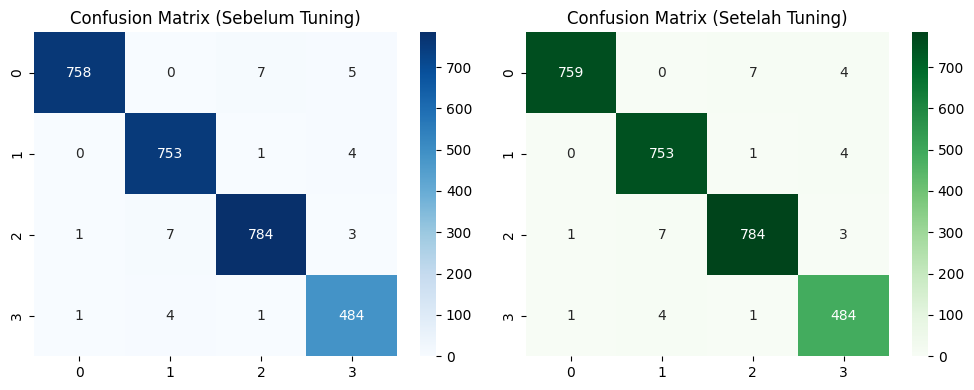

<ipython-input-9-2b7de6d28517>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="rocket")


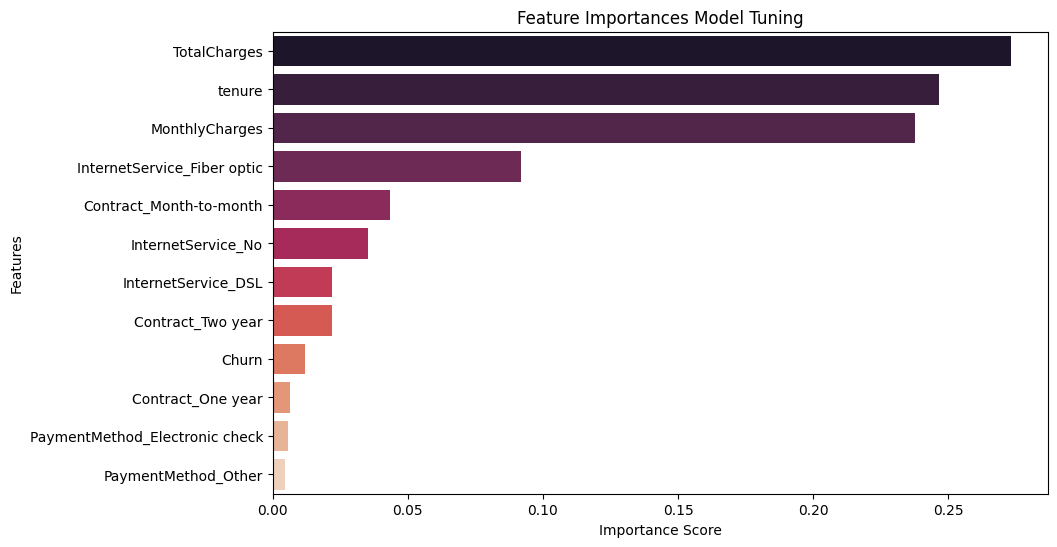

In [9]:
# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model setelah tuning
print("\n=== Performa Model Setelah Tuning ===")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Akurasi: {accuracy_tuned:.2f}")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_tuned))

# Bandingkan dengan model sebelum tuning
print("\n=== Perbandingan Performa ===")
print(f"Akurasi Sebelum Tuning: {accuracy_score(y_test, y_pred):.2f}")
print(f"Akurasi Setelah Tuning: {accuracy_tuned:.2f}")
print(f"Peningkatan Akurasi: {(accuracy_tuned - accuracy_score(y_test, y_pred)):.2f}")

# Visualisasi Confusion Matrix setelah tuning
plt.figure(figsize=(10, 4))

# Sebelum tuning
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix (Sebelum Tuning)')

# Setelah tuning
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix (Setelah Tuning)')

plt.tight_layout()
plt.show()

# 5. Analisis feature importance
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out()) + numerical_features
importances = best_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="rocket")
plt.title('Feature Importances Model Tuning')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

###1. Evaluasi model sebelum dan setelah tuning
- Model tidak mengalami perbedaan hampir sama sekali, namun pemberlakuan gridsearch memakan waktu komputasi yang cukup lama, bisa disimpulkan tuning tidak diperlukan.
- Skor akurasi masih tinggi pada 0,98

###2. Kelemahan model
- **Precision dan Recall:**
  - Semua kelas (0, 1, 2, 3) memiliki precision dan recall sangat tinggi (0.98–1.00). Namun, perlu diuji apakah hasil ini valid pada data yang tidak seimbang atau kasus edge cases.
  - Kelas 3 (support: 490) memiliki precision dan recall sedikit lebih rendah (0.98–0.99), tetapi perbedaannya tidak signifikan.

- **Overfitting/Underfitting:**
  - Akurasi tinggi pada data uji (0.99) menunjukkan model tidak mengalami underfitting.

  - Tidak ada indikasi overfitting karena tidak ada penurunan performa pada data uji. Namun, perlu dipastikan dengan validasi silang atau data tambahan.

- **Fitur Dominan:**
  
  Fitur seperti TotalCharges, tenure, dan MonthlyCharges mendominasi skor kepentingan. Hal ini dapat menyebabkan model kurang responsif terhadap fitur lain (misalnya PaymentMethod atau Contract), terutama jika ada perubahan pola data di masa depan.

###3. Rekomendasi tindak lanjut

- **Penanganan Data:**

  - Meskipun dataset tampak seimbang (support kelas 0–3: 490–795), pastikan tidak ada bias dalam representasi kelas minoritas (misalnya kelas 3).
  - Kumpulkan data tambahan untuk kelas 3 agar model lebih robust.

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.